# Part 1: Creating a static map

In [1]:
# import libs
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

# read files
countries_fp = "data/background.geojson"
popden_fp = "data/popden_eu.geojson"
countries = gpd.read_file(countries_fp)
popden = gpd.read_file(popden_fp)

# check crs
print(popden.crs, countries.crs)
print(f"Layer crs: {CRS(popden.crs).name}")
# crs is wgs84

epsg:4326 epsg:4326
Layer crs: WGS 84


In [2]:
# change crs to contextlys base crs in case i need a basemap
popden = popden.to_crs(epsg=3857)
countries = countries.to_crs(epsg=3857)

# should be WGS84 pseudo mercator
print(f"Layer crs: {CRS(popden.crs).name}")

# should be true
popden.crs == countries.crs

Layer crs: WGS 84 / Pseudo-Mercator


True

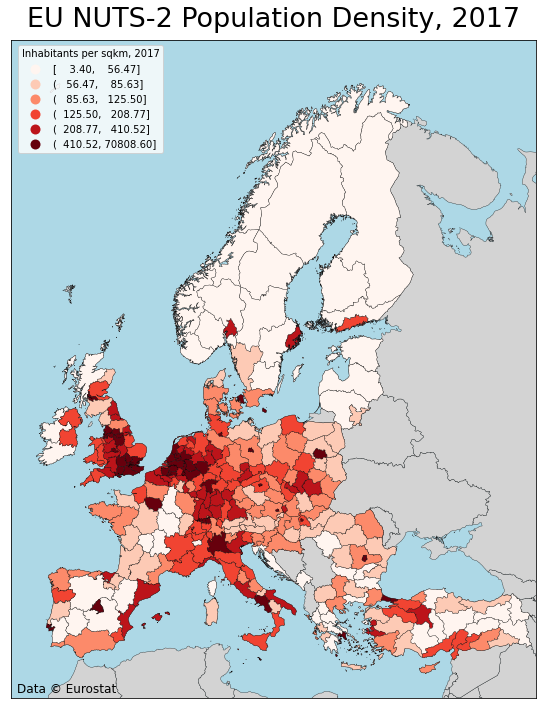

In [35]:
# Create one subplot
fig, ax = plt.subplots(figsize=(10,10))

# credits 
credits = "Population data by Eurostat 2017, Map Data © Stamen Design"

# plot layers
countries.plot(ax=ax, color = 'lightgrey', edgecolor='black', linewidth=0.3)
popden.plot(ax=ax, 
                 column="PopDen_PD2017", 
                 linewidth=0.3, 
                 cmap="Reds", 
                 scheme="quantiles", k=6,  alpha=1, 
                 legend = True,  
                 edgecolor="black",
)

# set legend title 
ax.get_legend().set_title("Inhabitants per sqkm, 2017")
ax.get_legend().set_bbox_to_anchor((0.30,1)) 

# set borders
ax.set_xlim(-1500000, 5050000)
ax.set_ylim(3800000, 12000000)

# set background color
ax.set_facecolor('#ADD8E6')

# turn off axis labels
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# set map title
plt.suptitle('EU NUTS-2 Population Density, 2017', size=27, y=0.98)
plt.annotate('Data © Eurostat', (0,0), (6, 15), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')
# set layout
plt.tight_layout()

In [36]:
# save plot
output_fig = "docs/eu_nuts2_popden_2017.png"
fig.savefig(output_fig)

# Part 2: Creating interactive map via folium

In [5]:
# import libs
import folium as folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from pyproj import crs
import geopandas as gpd
import matplotlib.pyplot as plt

# load data
public_transport_fp = "data/citybahn_cologne.geojson"
clubs_fp = "data/clubs_cologne.geojson"
public_transport = gpd.read_file(public_transport_fp)
clubs = gpd.read_file(clubs_fp)

# extract x and y in case i want a heatmap or so
clubs["x"] = clubs["geometry"].x
clubs["y"] = clubs["geometry"].y

# create tooltip
tooltip_clubs = folium.features.GeoJsonTooltip(
    fields=["club", "strasse", "plz", "musik"],
    aliases=["Name:", "Street:", "Postal Code:", "Genres:"],
    labels=True,
    sticky=False
)

tooltip_stations = folium.features.GeoJsonTooltip(
    fields=["HstName"],
    aliases=["Name:"],
    labels=True,
    sticky=False
)

# create popup, this doesnt work, possibly due to a bug because the implementation is correct 
#my_popup = folium.features.GeoJsonPopup(
    #fields=["club", "strasse", "plz", "musik"],
    #aliases=["Name:", "Street:", "Postal Code:", "Genres:"],
    #localize=True,
    #parse_html=True
#)

# add folium point data
clubs_folium =  folium.features.GeoJson(clubs, 
                                        name="Clubs Cologne", 
                                        # popup=my_popup, 
                                        tooltip=tooltip_clubs, 
                                        style_function= lambda x :{'fillColor': 'red'}, 
                                        show=True
                                       )
public_transport_folium = folium.features.GeoJson(public_transport, 
                                                  name="Tram Stations Cologne-Bonn",
                                                 tooltip=tooltip_stations)

# create folium instance
m = folium.Map(location=[50.93, 6.96], zoom_start=13, control_scale=True,  tiles = 'cartodbpositron')

# add clubs to instance
clubs_folium.add_to(m)
public_transport_folium.add_to(m)

# add control layer
folium.LayerControl().add_to(m)

# show map
m

In [6]:
# save html output
outfp = "docs/clubs_cologne.html"
m.save(outfp)